## **Estimate Car Prices**

*Mümin Ahmedoğlu*

*Lekaa Elmesilhy*


**1. Introduction**

We are required to model car prices with available explanatory variables. It will be used by management to understand how prices of a car vary across explanatory variables. They can appropriately manipulate car design, business strategy, etc., to match certain price levels. Besides, the model will be a good way for management to understand the dynamics of pricing in the new market so that they’ll have an idea about:

- What variables are important in predicting the price of a car
- How well do these variables describe the price of a car?
- Predicting a car price using some predictors.


**2. Data**

**2.1 Original Data Set**

This data is conducted from Kaggle website, also write the link into the References. There’re 205 observatons with no missing values. The data have11 categorical and 13 cantinuous variables with one continuous target variable. There’s an associated paper with this data which we’ll use to write a reaction paper about in the end of this project.

**2.2 Data Preprocessing**


Since the data have a moderate size there is no data reduction applied. After studying and visualizing the data we’ve found that some categorical variables are having extremely imbalanced groups. Therefore, we found it useful for the model building process to delete the imbalanced categorical variables. The deleted variables are listed as follows:
- *CarName [Categorical]:* The name of the car which includes its brand and model, includes 146 unique groups.
- *Enginlocation [Categorical]:* The location of the engine in the car, includes 203 front and 3 rear.

We have randomly split our data into a training set and a validation set. Since we have 9 categorical columns, we had 29 combinations, we took random 70% of each combination to be training set and 30% to be validation set. We did that to have the data distributed between the training and validation in a way that keeps balanced categorical observations.
Note: there were 35 combinations which have only one observation each. These observations are used in the training set.
The raining data set has 143 observation (70%) while the validation set has 62 observation (30%).

We have done standardization for the continuous predictors to have scaled data. Therefore, for any estimation or prediction usage, the observation needs to be standardized first.

**2.3 Preprocessed Data Set Description**

We are left with 22 predictors, 9 categorical, and 13 continuous, that may be affecting
our target variable (the price of the car). We have 205 observations.
We have adjusted (coded) the data in a way that for some categorical variables we coded the group which has the most frequency as 0 and others as 1. Our predictors after the data coding step are listed as follows:
Symbolling [Categorical]: The symbolism corresponds to the degree to which the car is riskier than its price indicates. The car is initially assigned a risk factor symbol associated with its price. Then, if it is riskier (or less), this symbol is adjusted by moving it up (or down) the scale. It has integer values from -2 to 3.
• 0 if the observation is -2 -1 or 0
• 1 if the observation is 1 2 or 3
includes 92 (-2 -1 and 0) and 113 (1 2 and 3).
- Feultype [Categorical]: The type of fuel the car uses.
• 0 if the observation is Gas
• 1 if the observation is diesel includes 185 gas and 20 diesels.
- Aspiration [Categorical]: A naturally aspirated engine, also known as a commonly aspirated engine, is an internal combustion engine in which the air intake depends solely on atmospheric pressure and does not have forced induction through a turbocharger or supercharger.
• 0 if the observation is std
• 1 if the observation is turbo includes 167 std and 38 turbo.
- Doornumber [Categorical]: The number of doors the car has.
• 0 if the observation is four
• 1 if the observation is two includes 115 four and 90 two.
- Carbody [Categorical]: The shape of the body of each car.
• 0 if the observation is sedan
• 1 if the observation is other includes 96 sedan and 109 other.

- Drivewheel [Categorical]: A drive wheel is a wheel in a vehicle that transmits force by converting torque into tractive force from the tires to the road, causing the vehicle to move.
• 0 if the observation is fwd
• 1 if the observation is other includes120 fwd and 85 others.
- Enginetype [Categorical]: The type of engine of each car.
• 0 if the observation is ohc
• 1 if the observation is other includes 148 ohs and 57 others.
- Cylindernumber [Categorical]: The number of cylinders in the engine of the car.
• 0 if the observation is four
• 1 if the observation is other includes159 four and 46 other.
- Fuelsystem [Categorical]: A car's fuel system consists of components that deliver fuel from the tank to the engine, including the fuel pump, fuel lines, fuel pressure regulator, fuel filter, and fuel injectors. Fuel system components are built to last, so the fuel filter is the only part that will likely need to be replaced on schedule.
• 0 if the observation is diesel
• 1 if the observation is other includes 94 mpfi and 111 other.
- Wheelbase [Continuous]: The wheelbase of a car is the distance between the centers of the front and rear wheels. Therefore, it is less than the total length of the vehicle as measured from the front and rear.
- Carlength [Continuous]: The length of the car.
- Carwidth [Continuous]: The width of the car.
- Carhight [Continuous]: The height of the car.
- Curbweight [Continuous]: The weight of the car.
- Enginesize [Continuous]: The size of the engine of the car.
- Boreratio [Continuous]: The Bore-Stroke Ratio is the ratio between the bore
of the engine and the length of the piston stroke.
- Stroke [Continuous]: The stroke length is how far the piston travels in the
cylinder, which is determined by the cranks on the crankshaft. Engine displacement is calculated by multiplying the lateral area of the cylinder (defined by the bore) by the stroke length.
- Compressionratio [Continuous]: Compression ratios typically range from 8: 1 to 10: 1. A higher compression ratio - say 12: 1 to 14: 1 - means higher combustion efficiency. Higher compression ratios and combustion efficiencies
mean more power with less fuel and less exhaust.
- Horsepower [Continuous]: Engine power is called horsepower.
Mathematically speaking, one horsepower is the power required to move 550 pounds of one foot in one second, or the power required to move 33,000 pounds of one foot in one minute.
- Peakrpm [Continuous]: The maximum rpm a car engine can reach.
- Citympg [Continuous]: This number is the average MPG for your vehicle in
the city. Since city driving tends to mean rougher roads and frequent stops and
starts, this number is usually the lowest of the three.
- Highwaympg [Continuous]: Highway MPG is the average MPG for your
vehicle on the highway. Even if you drive faster and often for longer periods of time, the highways are smoother than city roads and keep your engine running at a consistent level that requires less gas.
- Price [Continuous]: The target variable is the estimated price of the car.

**Descriptive statistcs of the continuous predictors:**
 
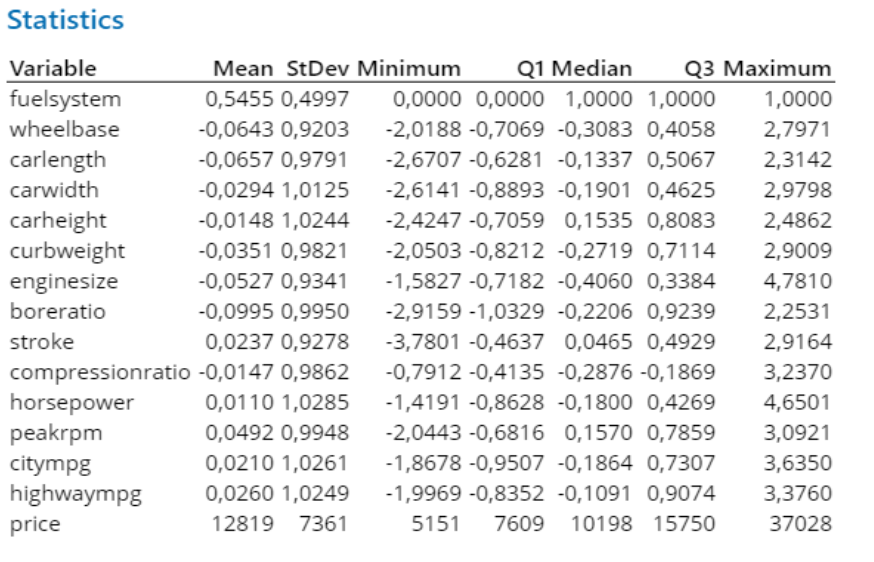

**3. Multiple Linear Regression (MLR) Analysis**

The strategy of MLR analysis for this project is followed as suggested in the textbook which was used in the course, Applied Linear Statistical Models by Kutner, Nachtsheim, and Neter (5th edition), and the open access course material provided by Penn State University for STAT501 course.

**3.1 Relation of Variables**

Because of the large number of predictors specially the categorical ones, we’ll visualize the matrix scatter plot of the continuous predictors only.

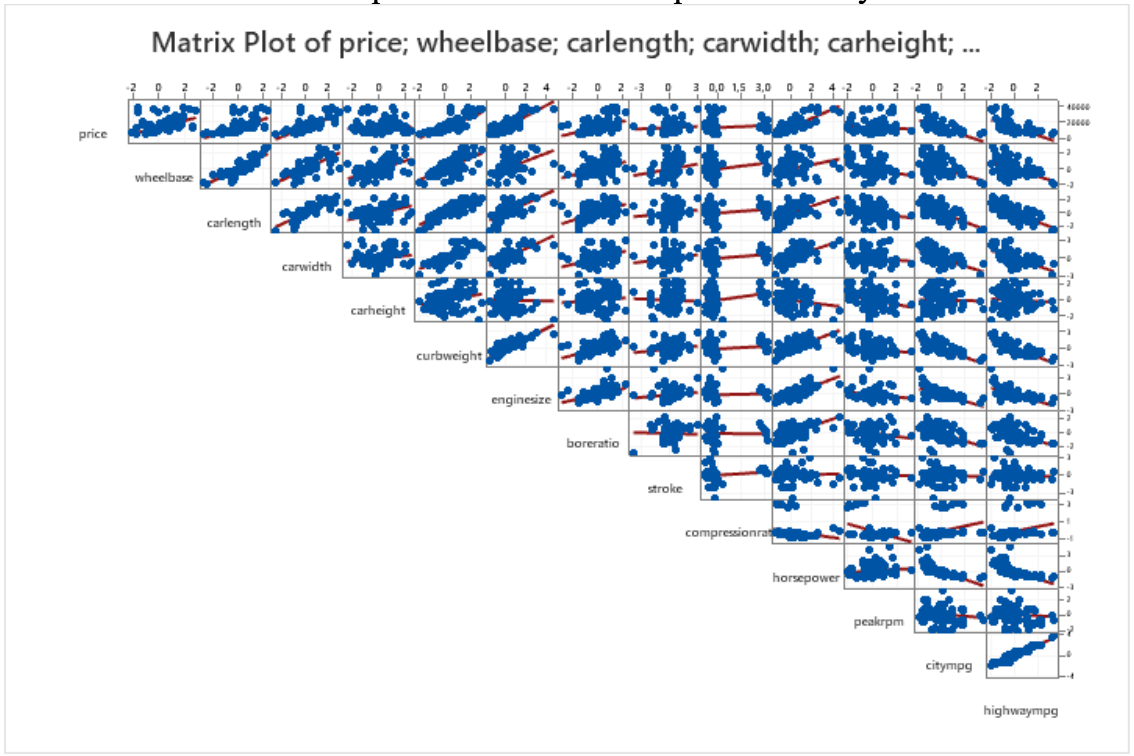

Visualizing the above scatter matrix plot of the continuous predictors, we’ll first comment on the relationship between the response and each predictor. Then we’ll comment on the relationship between the predictors.

The relationship between the response and each predictor:
It seems that the response has a strong positive linearship with the following predictors:

→ Wheelbase, carlength, carwidth, curbweight, enginesize and horsepower. It seems that the response has a strong negative linearship with the following predictors:

→ Citympg and highwaympg.
The relationship between the predictors:
It seems that there’s a strong positive linearship with the following predictors:

→ Wheelbase, carlength, carwidth, curbweight and horsepower. → curbweight, enginesize and horsepower.

→ Citympg and highwaympg.
It seems that there’s a strong positive linearship with the following predictors: → Highwaympg and curbweight, carlength.

→ Citympg and carlength.

**3.2 Variable Selection**

Because there’s too many variables, we’ve choosen 2 candidate models using Stepwise Regression and Best Subsets analysis.

**3.3 Development of Model 1**

The following model is fitted to the data to explain the relationship between the price of a car and some important features of it.

𝒚 = 𝜷𝟎 + 𝜷𝟏𝑒𝑛𝑔𝑖𝑛𝑒𝑠𝑖𝑧𝑒 + 𝜷𝟐𝑐𝑦𝑙𝑖𝑛𝑑𝑒𝑟𝑛𝑢𝑚𝑏𝑒𝑟 + 𝜷𝟑 𝑐𝑎𝑟𝑤𝑖𝑑𝑡h +
𝜷𝟒 h𝑜𝑟𝑠𝑒𝑝𝑜𝑤𝑒𝑟+𝜷𝟓𝑐𝑎𝑟h𝑒𝑖𝑔h𝑡+𝜷𝟔𝑐𝑜𝑚𝑝𝑟𝑒𝑠𝑠𝑖𝑜𝑛𝑟𝑎𝑡𝑖𝑜+𝜷𝟕𝑠𝑡𝑟𝑜𝑘𝑒+ 𝜷𝟖 𝑒𝑛𝑔𝑖𝑛𝑒𝑡𝑦𝑝𝑒 + 𝜷𝟗 𝑑𝑟𝑖𝑣𝑒𝑤h𝑒𝑒𝑙 + 𝜷𝟏𝟎 𝑝𝑒𝑎𝑘𝑟𝑝𝑚 + 𝜺

where 𝜺~𝑵𝑰𝑰𝑫(𝟎, 𝝈𝟐).
**The fitted regression equation is obtained as the following:**

Price = 12104 + 3324 enginesize + 3799 cylindernumber + 1348 carwidth + 1697 horsepower + 557 carheight + 835 compressionratio - 957 stroke - 2030 enginetype + 1462 drivewheel + 734 peakrpm

**3.3.1 Analysis Step 1 (Minitab outputs in Appendix 1 – 3.3.1)**

**• Checking Normality:**

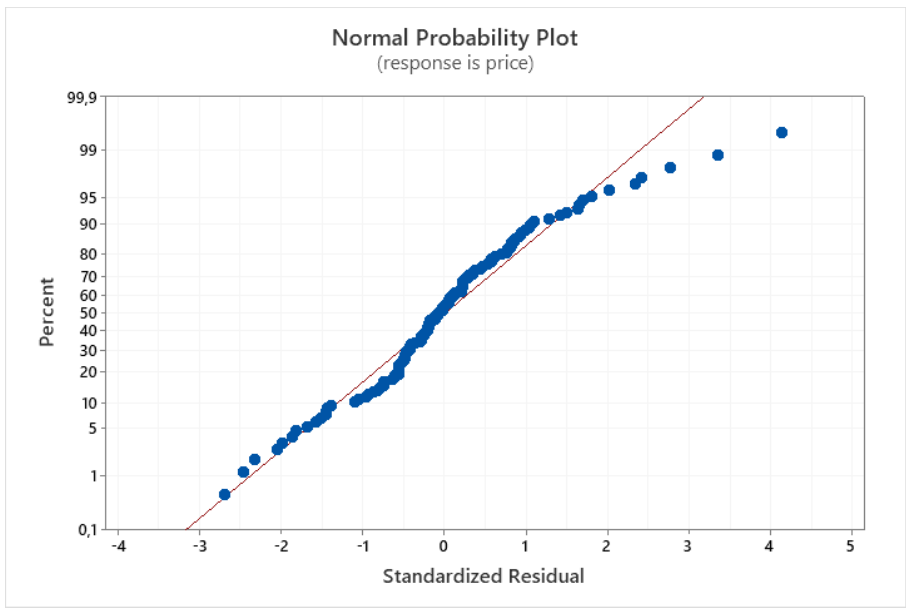

**1.Normal probability plot (NPP) of standardized residuals:**

The points in the plot do not follow the reference line well i.e the standard residuals don’t seem to follow a normal distribution.

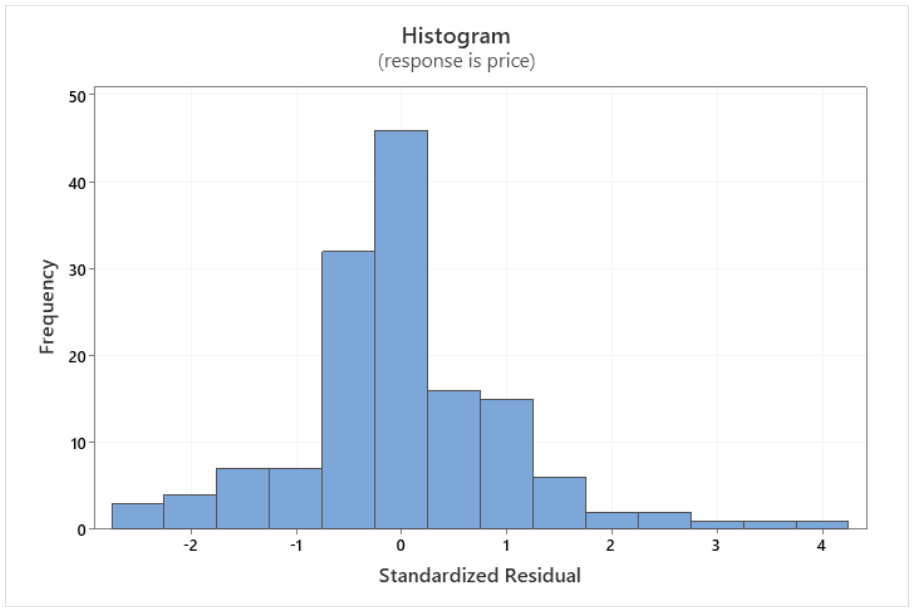

**2.Histogram of the standard residuals:**

The histogram seems to have a bell-shape however it’s not too obvious.

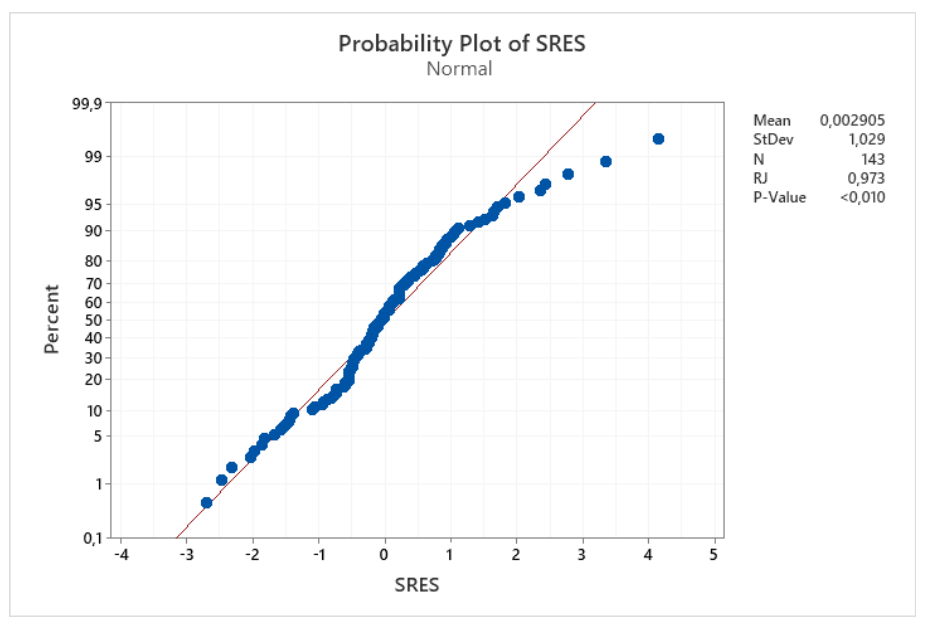

**Ryan-Joiner test (similar to Shapiro-Wilk test):**

Conducting the Ryan-Joiner test to test the normality of the standardized residuals with 0.05 level of significance.

𝛼 = 0.05

𝐻0: standardized errors follow a normal distribution.

𝐻𝑎: standardized errors do NOT follow a normal distribution.

Since P-value < 0.05, we reject the null hypothesis that the errors follow a normal distribution concluding that **the errors are not normally distributed**.




**• Checking Equal Error Variance:**

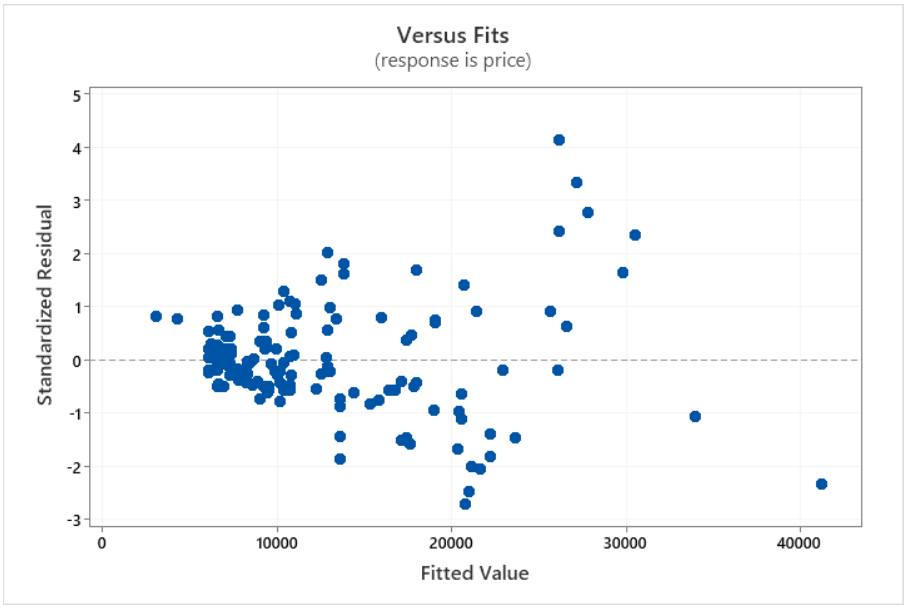

**Standardized residuals versus fitted values plot:**

The scatterplot suggests that the variances of the errors might not be equal since the spread of the points gets wider as we visualize the plot from left to right.

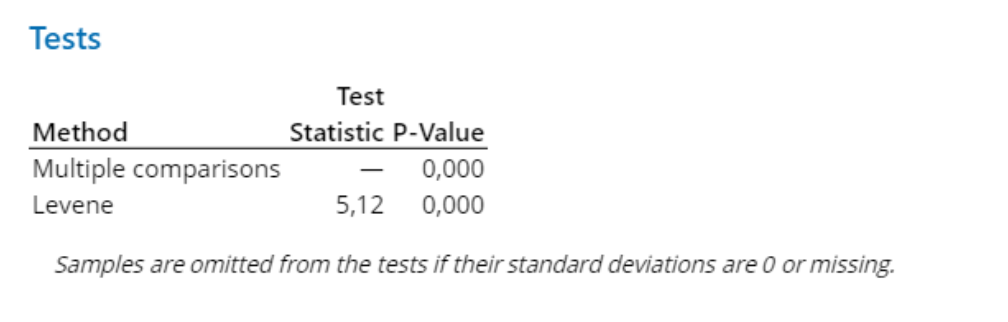

As the normality assumption doesn’t hold we will use **Levene’ test** to test whether the errors have equal variance or not:

with a 0.05 significance level.

𝐻0: Errors have a constant variance.

𝐻𝑎: Errors do NOT have constant variance.

We reject that the errors have a constant variance because of P-value < 0.05. We conclude that **the errors don’t have constant variance**.

**• Checking Independence of the Errors:**

Since we don’t know the order of the observations were taken in, we can’t examine the Observation order versus standardized residuals plot. We also don’t have any information about the time related to this sample. So, we won’t use any graphs to assess the independence of the errors instead, we’ll use Durbin-Watson (D-W) test with n=143 and p = 11, however, in the D-W table we didn’t find n=143 so we’ll use n=150.

𝐻0: There is no autocorrelation between the errors (ρ=0)

𝐻𝑎: There is positive autocorrelation between the errors (ρ>0) (since D-W statistic < 2)

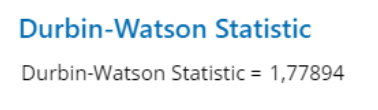

From the table: L= 1.579 and U= 1.892 and Minitab have reported the D-W statistic to be = 1.779 which full between L and U values, so it’s inconclusive but we can consider this value as fail to reject the null hypothesis and conclude that **the errors are independent**.

**• Checking Unusual Observations:**

 
**• outliers and leverage points:**

There are only 2 potential outliers:

The 22nd observation with SRES = 3,35019 and the 98th observation with SRES= 4,13942

To be sure that these 2 observations are outliers or not we conduct a t-test using the Bonferroni approach with 𝛼= 0.05, m(potential outliers)=2, n= 143, p= 11

The critical value 𝑡 𝛼 = 𝑡0.0125,131 = 2.267 (since t-distribution is symmetric) 2𝑚,𝑛−𝑝−1

Since the TRES of the 22th observation = 3.48910 > 2.267(the critical value) and TRES of the 98th observation = 4.42060 > 2.267. we can be sure at α=0.05 level of significance that **the 22nd and 98th observations are outliers**.

Comparing the leverage values (HI) with the cut-off point= 2𝑝 where p=11 and n=
143

Cut-off point= 0.154, the 90th, 130th, 18th, 91th, 99th, 117th, and 22nd observations seem to be leverage points.

HI values of the above observations:

(90): 0.161 

(91): 0.161 

(81): 0.216 

(22): 0.227 

(117): 0.381

(130): 0.201 

(99): 0.271

**• influential points:**

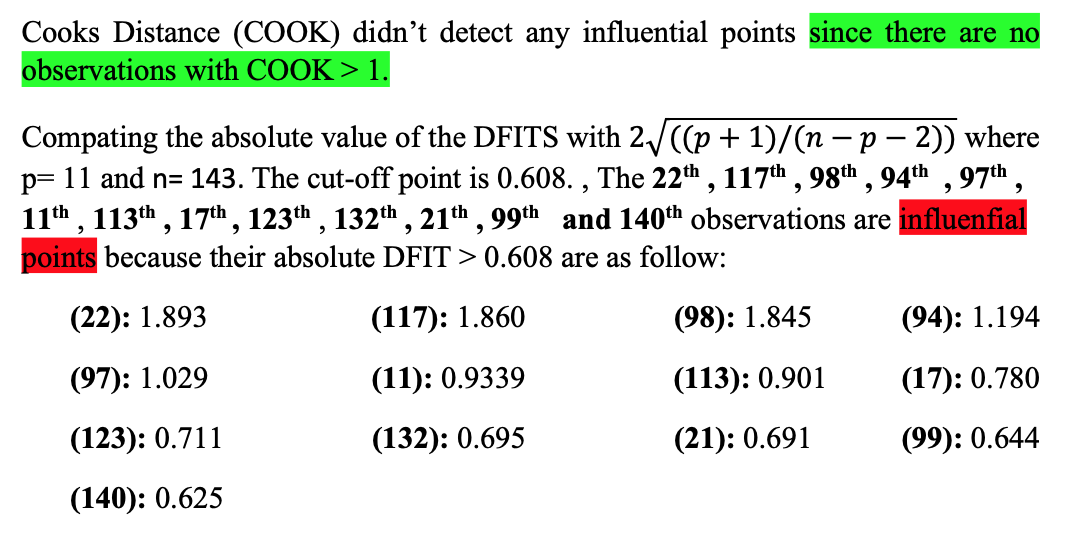

**• Checking Multicollinearity( correlation between predictors ):**

All variance inflation factors (VIF) are < 10 which means there’s no multicollinearity.

**• Checking Linearity (lack-of-fit):**

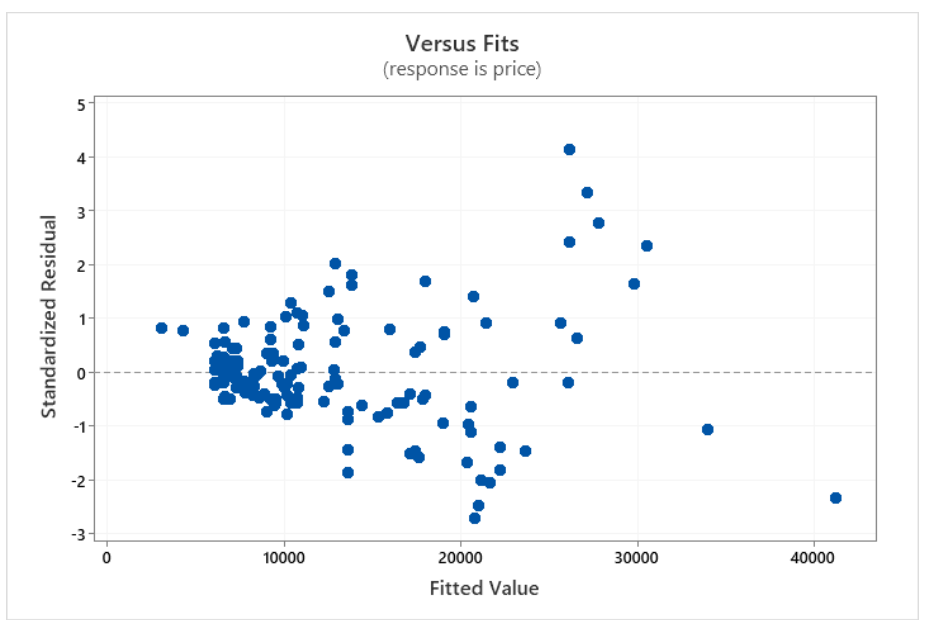

**Standardized residuals versus fitted values plot :**

Visualizing the scatterplot, without considering the point on the very right of the plot which is a leverage and influential point (99th observation) we can see some upward curve. Still, when considering this point we can observe a lack of fit there. To be sure we will conduct a lack-of-fit test with 0.05 significant level.

𝐻0: There is no lack of fit in the model.

𝐻𝑎: There is a lack of fit in the model.

The p-value of the associated lack of fit test in Minitab is 0.000 < 0.05 so we reject the null hypothesis and conclude that there is a lack of fit in the model.

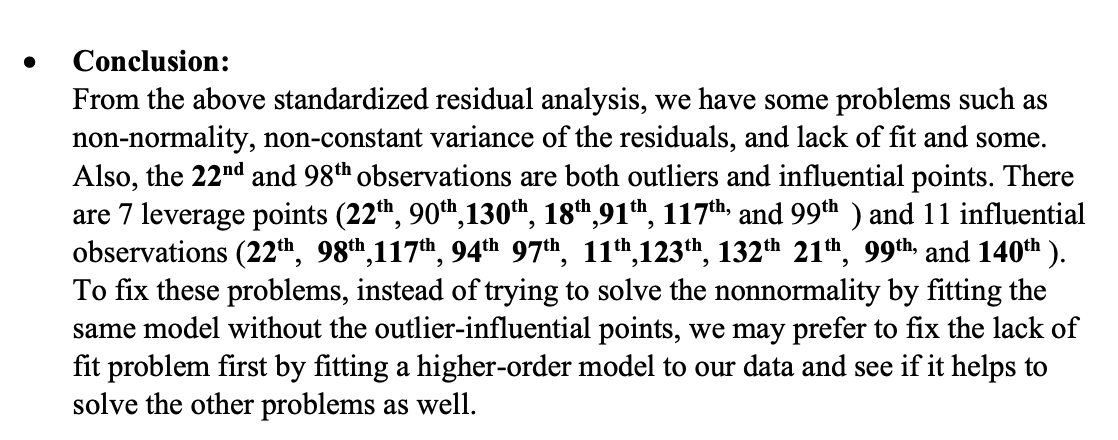



---


---




**Analysis Step 2 (Minitab outputs in Appendix 1 – 3.3.2)**

In this step, we’ll fit a higher-order model to overcome the lack of fit problems. In Minitab, we’ll fit a higher-order model and apply stepwise regression to choose which orders should be fit in the model.

The fitted higher-order regression model is: Appendix 1 in 3.3.2

**• Checking Normality:**

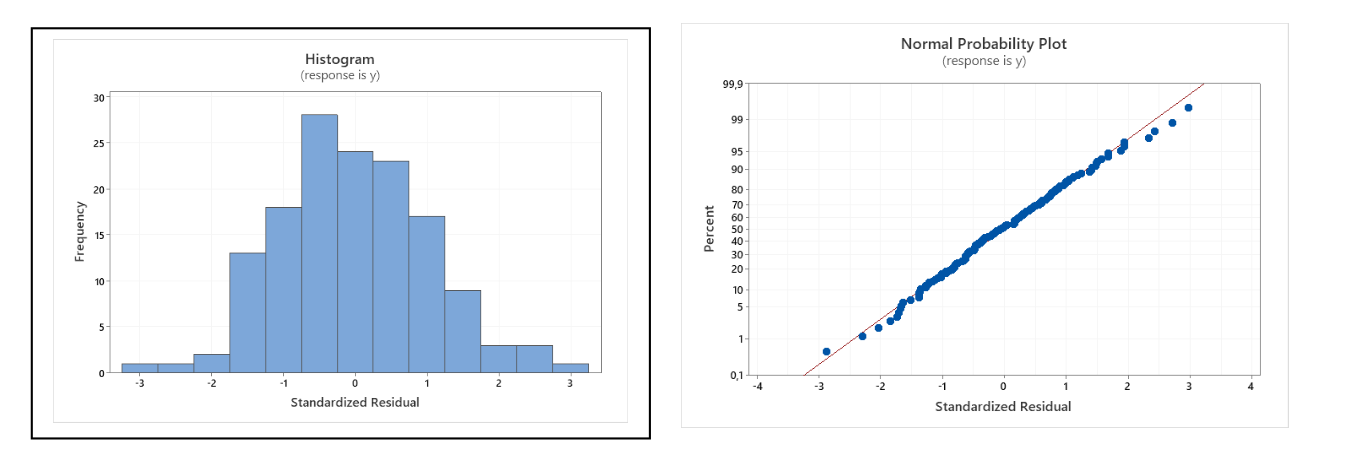

The points in the above **normal probability plot (NPP) of the standardized residuals** follow the reference line well which means the standard residuals seem to be normally distributed. Also by looking at the **histogram of the standardized residuals** we can easily see that it has a bell-shaped distribution which again suggests that the standardized residuals follow a normal distribution. To check our claim we will conduct a **Ryan-Joiner test (similar to the Shapiro-Wilk test )**: with a 0.05 level of significance.

𝛼 = 0.05

𝐻0: standardized residuals follow a normal distribution.

𝐻𝑎: standardized residuals do NOT follow a normal distribution.

Since P-value =0.839 > 0.05, we fail to reject the null hypothesis that the errors follow a normal distribution concluding that the errors are normally distributed.

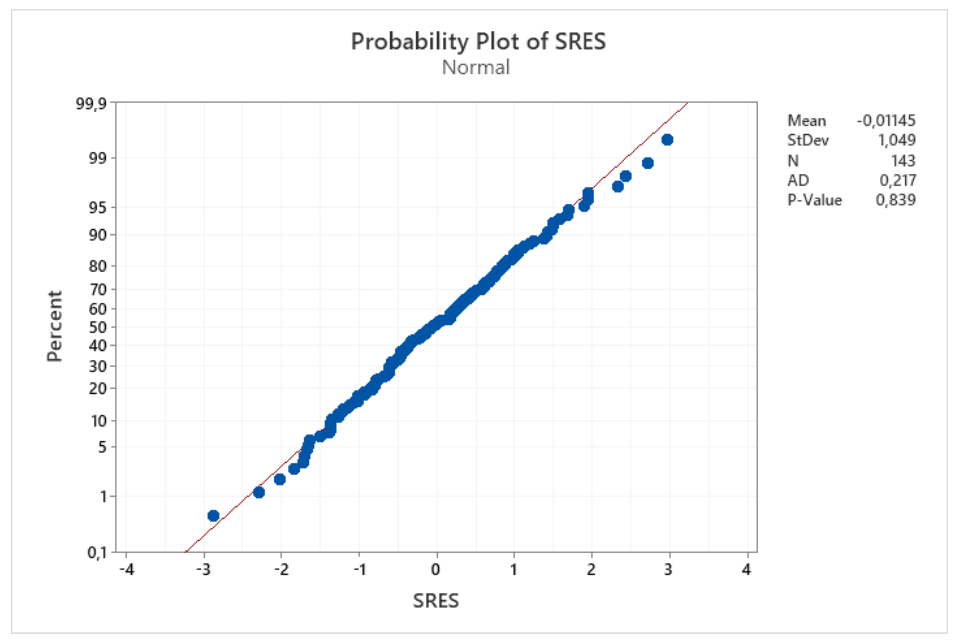

**• Checking Equal Error Variance:**

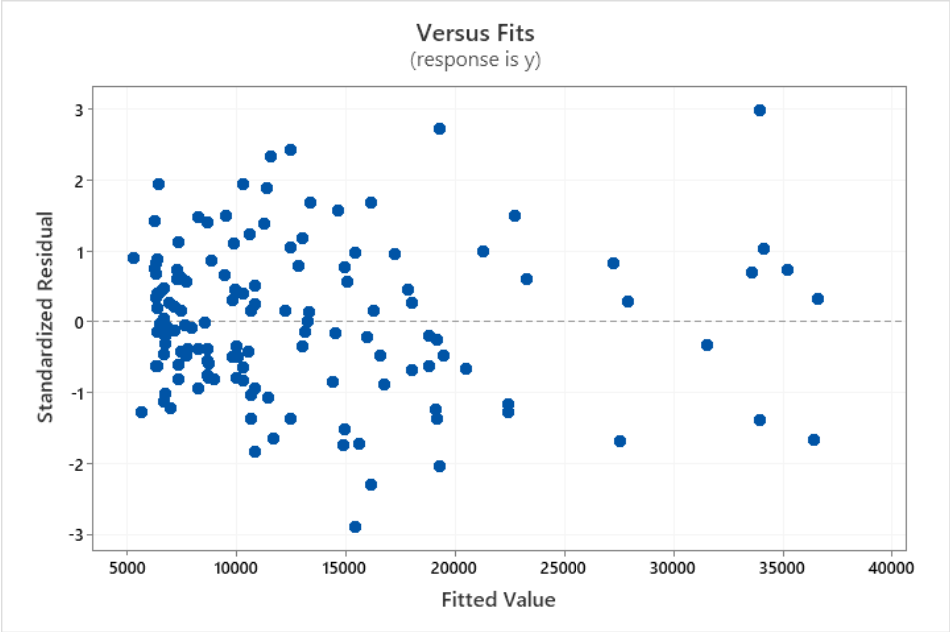



The above **standardized residuals versus fitted values plot** suggest that the variance of the errors might be constant since the points seem to create a band i.e the spread of the points is almost the same at each value. Since the standardized residuals are normally distributed and the data have replicates we can conduct Bartlett’s test for a constant variance of the errors with a 0.05 significance level.

𝐻0: Errors have a constant variance.

𝐻𝑎: Errors do NOT have constant variance.

We reject that the errors have a constant variance because of P-value = 0.015 < 0.05. We conclude that **the errors don’t have constant variance**.

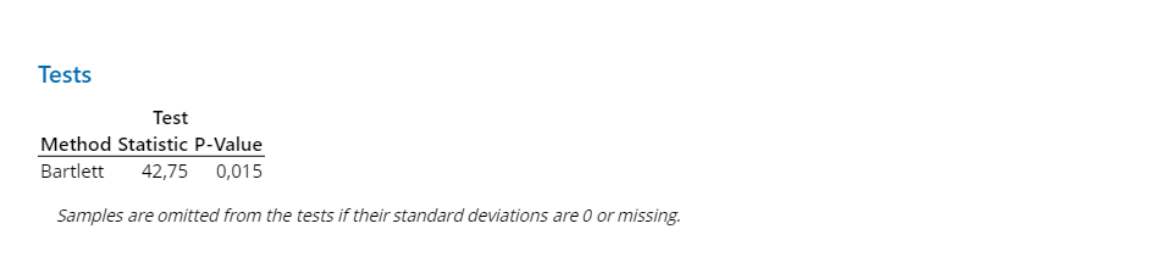

**• Checking Independence of the Errors:**

Since we don’t know the order of the observations were taken in, we can’t examine the Observation order versus standardized residuals plot. We also don’t have any information about the time related to this sample. So we won’t use any graphs to assess the independence of the errors instead, we’ll use Durbin-Watson (D-W) test with n=143 and p = 32, however, in the D-W table we didn’t find n=143 so we’ll use n=150 and also the biggest number of parameters in the table is p=20, therefore, we’ll use the table with n=150 and p=20.

𝐻0: There is no autocorrelation between the errors (ρ=0)

𝐻𝑎: There is a negative autocorrelation between the errors (ρ>0) (since D-W statistic > 2)

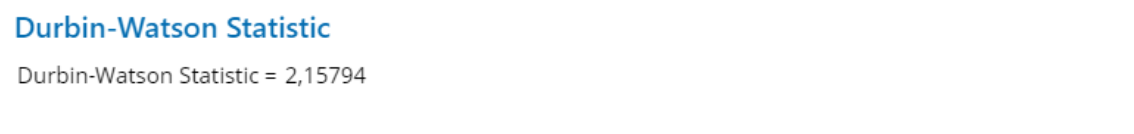

From the table: L= 1.443 and U= 2.040 and Minitab have reported the D-W statistic to be = 2.158 which is bigger than the U, so we fail to reject the null hypothesis and conclude that **the errors are independent**.

**• Checking Unusual Observations:**

**✓ outliers and leverage points:**

There are no potential outliers since all SRES values fall between -3 and 3. Therefore there’s no need to use TRES.
Comparing the leverage values (HI) with the cut-off point= 2𝑝 where p=32 and
n= 143
Cut-off point= 0.448, there’re 17 observations seem to be leverage points whose numbers are listed below with their HI values.


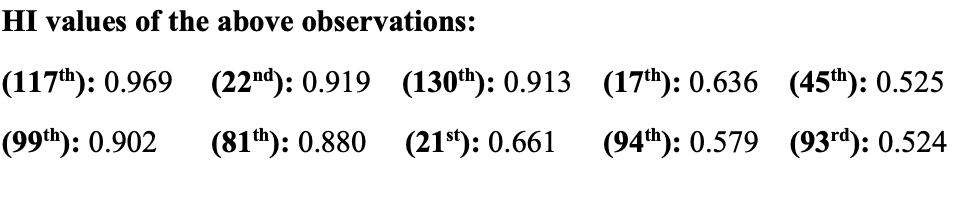

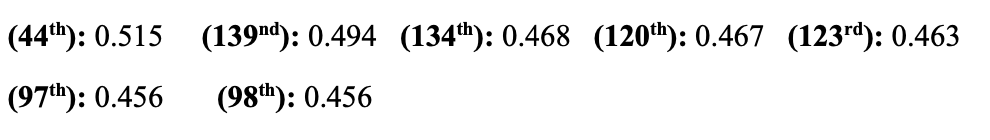

**✓ influential points:**

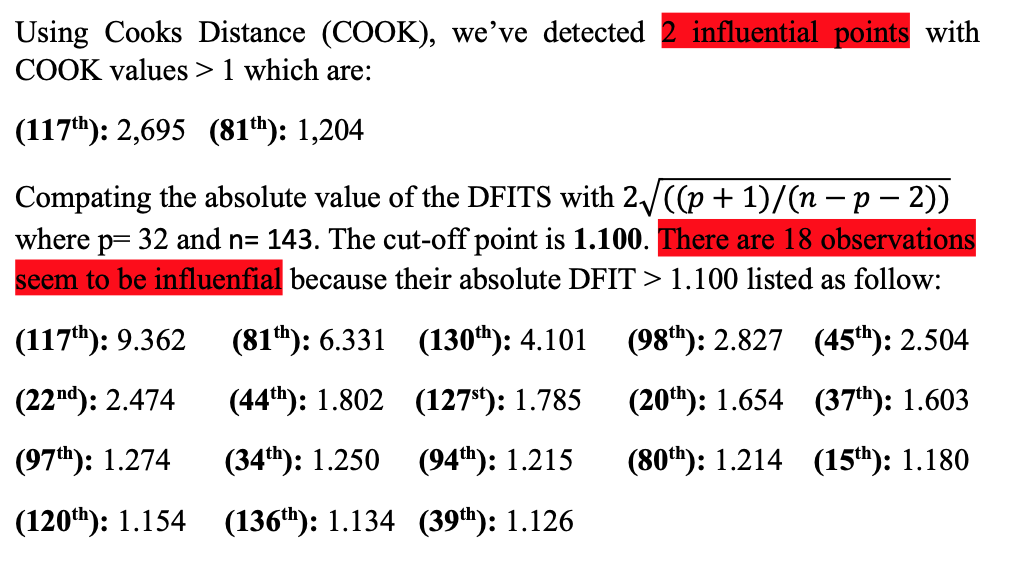

**• Checking Multicollinearity( correlation between predictors ):**

Because of the higher-ordered terms, we fitted in the model, **there is a structural multicollinearity problem**. There are VIF values bigger than 10 for some terms.

**• Checking Linearity (lack-of-fit):**

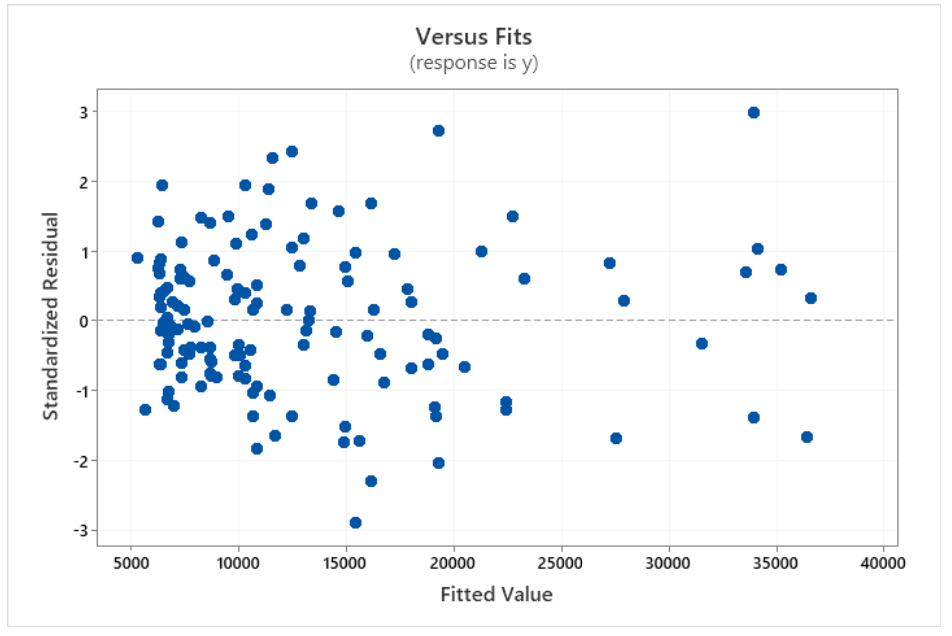

Visualizing the **standardized residuals versus fitted values plot** the means of the standardized residuals seem to be 0 at each value also there seems no to have a lack of fit problem, however, we’ll conduct a lack-of-fit test with 0.05 significance level.

𝐻0: There is no lack of fit in the model. 

𝐻𝑎: There is a lack of fit in the model.

The p-value of the associated lack of fit test in Minitab is 0.391 > 0.05 so we fail to reject the null hypothesis and conclude that **there is NO lack of fit in the model**.



---



---



**• Conclusion:**

Although we got a kind of complex fitted regression equation, from the above standardized residual analysis, by adding higher ordered terms to the model we have fixed the non-normality and lack of fit problems. However, we still have a nonconstant error variance and structural multicollinearity problems. There are 17 leverage points,18 influential observations, and 17 leverage points. The 117th and 81st observations are both leverages and influential points. To fix the non-constant error variance problem, we might try the weighted least squares method or we can use the Box-cox transformation method to test whether transforming the response is a good idea to solve the problem. We also will center the data trying to overcome the structural multicollinearity problem.


**3.3.3 Analysis Step 3 (Minitab output in Appendix 1 - 3.3.3)**

In this step, we’ll first center the points to see if it fixes the structural multicollinearity problem. Then we’ll use Box-cox transformation to test whether we should transform the response to solve the non-constant error variance problem.

**Centering the points:**

Trying to solve the multicollinearity, we’ll center the data points which are subtracting the mean of each predictor from each of its observations and re-fit the same model with the centered data then examine the VIF values.

After centering the terms with high VIF, **still, there’s structural multicollinearity** with the same terms which means centering the terms didn’t help overcome the problem.(for Minitab output check Appendix 1)

**At this point:**

We’ve fitted many models with different predictors and different interactions by making many trial and error and finally, we’ve found a way to select some good predictors to fit a good model. Since the lack of fit was almost a problem at each step, using Minitab we’ve selected all the predictors we have in our data (22 predictors) and added all the possible higher terms and interaction between them then we’ve regressed them, on the transformed y we found from Box-Cox transformation (𝜆 = -0.394), using stepwise regression. After that, we’ve used the fitted equation from this step to fit a model and we briefly fixed the associated problems and finally, we ‘ve got a good model. In the next step, we’ll represent the model we obtained from this work.



---



---



**3.3.4 Analysis Step 4 (Minitab output in Appendix 1 - 3.3.4) ***


Checking assumptions of the fitted regression model below:

**Price^-0.394 = - 0,024320 + 0,000669 carwidth + 0,002600 curbweight - 0,000350 stroke + 0,000275 compressionratio+ 0,001432 horsepower+ 0,000134 stroke*stroke+ 0,001235 curbweight*stroke - 0,000864 curbweight*horsepower- 0,001073 stroke*horsepower – 0.001121 carbody -0.002189 enginetype + 0.001758 cylindernumber – 0.000686 feulsystem - 0,000509 curbweight*carbody - 0,001399 stroke*cylindernumber + 0,000566 stroke*fuelsystem - 0,001238 compressionratio*enginetype - 0,000481 compressionratio*cylindernumber + 0,001440 carbody*enginetype ** ***

**• Checking Normality:**

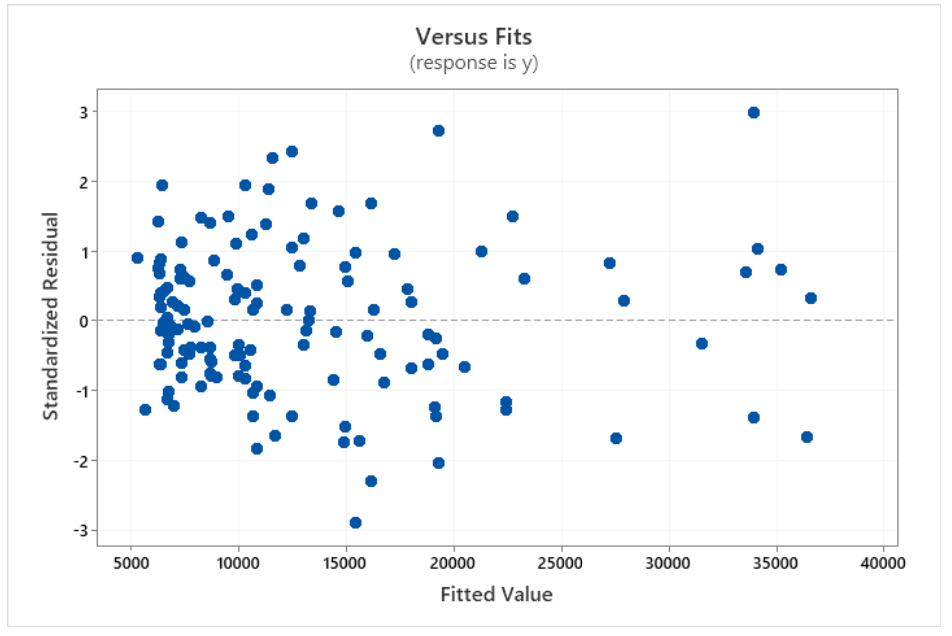

The points in the above **normal probability plot (NPP)** of the standardized residuals seem to follow the reference line well which means the standard residuals seem to be normally distributed. Also by looking at the histogram of the standardized residuals we might say that it has a bell-shaped distribution which again suggests that the standardized residuals follow a normal distribution. To check our claim we will conduct a Ryan-Joiner test (similar to the Shapiro-Wilk test ): with a 0.05 level of significance.

𝛼 = 0.05

𝐻0: standardized residuals follow a normal distribution.

𝐻𝑎: standardized residuals do NOT follow a normal distribution.

Since P-value >1.00 indicates that it’s also bigger than 0.05, we fail to reject the null hypothesis that the errors follow a normal distribution concluding that **the errors are normally distributed**.

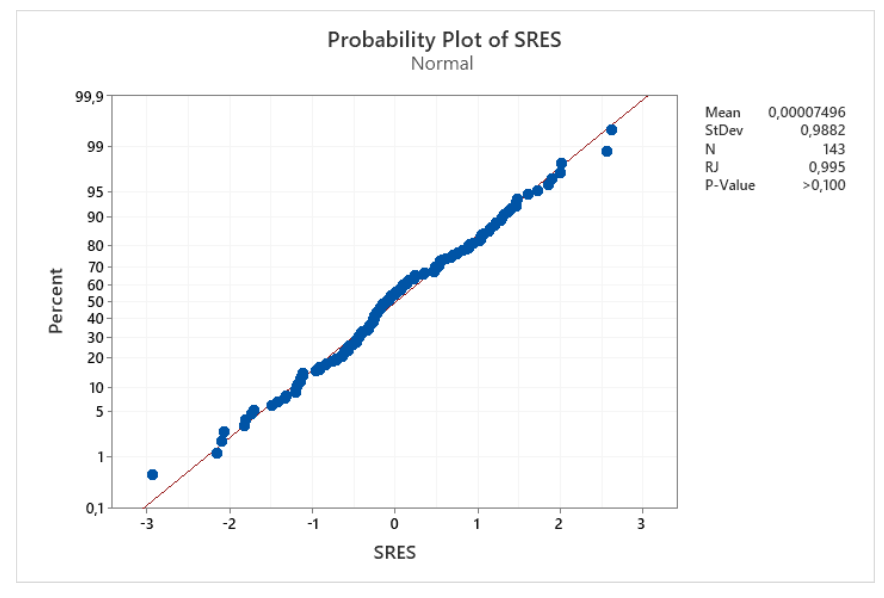

**• Checking Equal Error Variance:**

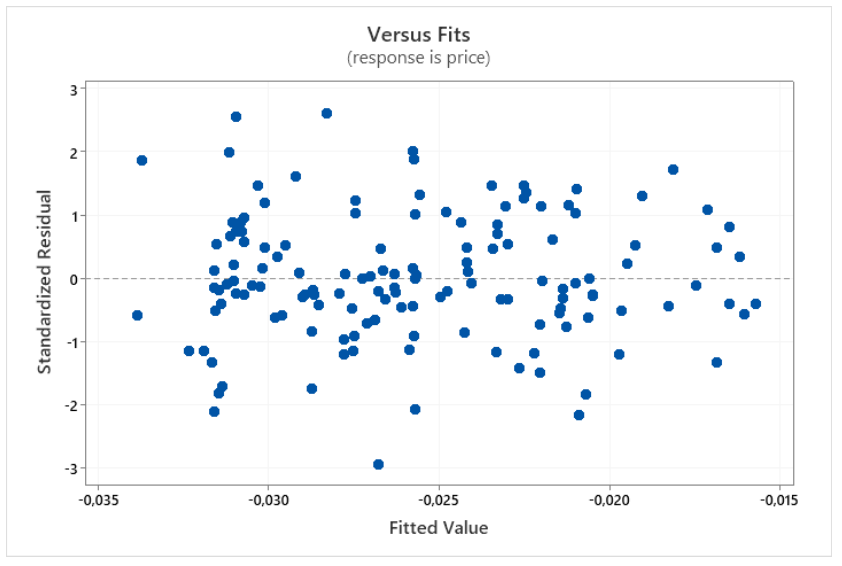

The above standardized residuals versus fitted values plot suggest that the variance of the errors might be constant since the points seem to create a band i.e the spread of the points is almost the same at each value. Since the standardized residuals are normally distributed and the data have replicates we can conduct an F test for a constant variance of the errors with a 0.
05 significance level.

𝐻0: Errors have a constant variance.

𝐻𝑎: Errors do NOT have constant variance.

We fail to reject that the errors have a constant variance because of P-value = 0.144 > 0.05. We conclude that **the errors have a constant variance**.

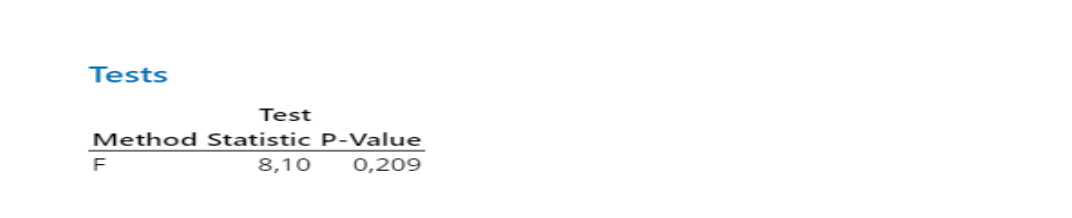

**• Checking Independence of the Errors:**

Since we don’t know the order of the observations were taken in, we can’t examine the Observation order versus standardized residuals plot. We also don’t have any information about the time related to this sample. So we won’t use any graphs to assess the independence of the errors instead, we’ll use Durbin-Watson (D-W) test with n=143 and p = 20, however, in the D-W table we didn’t find n=143 so we’ll use n=150 we’ll use the table with n=150 and p=20.

𝐻0: There is no autocorrelation between the errors (ρ=0)

𝐻𝑎: There is a negative autocorrelation between the errors (ρ>0)
(since D-W statistic > 2)

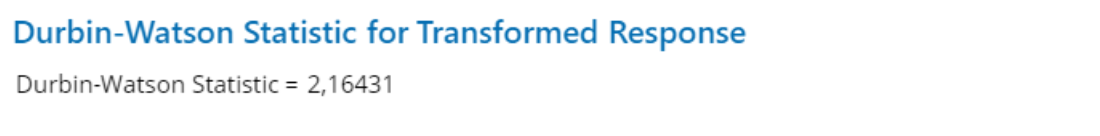

From the table: L= 1.443 and U= 2.040 and Minitab have reported the D-W statistic to be = 2.164 which is bigger than the upper boundary we fail to reject the null hypothesis and conclude that **the errors are independent**.

**• Checking Unusual Observations:**

**✓ outliers and leverage points:**

There are no potential outliers since all SRES values fall between -3 and 3. Therefore there’s no need to use TRES.
Comparing the leverage values (HI) with the cut-off point= 2𝑝 where p=20
and
n= 143

**Cut-off point= 0.280**, there’re 15 observations seem to be leverage points whose numbers are listed below with their HI values.

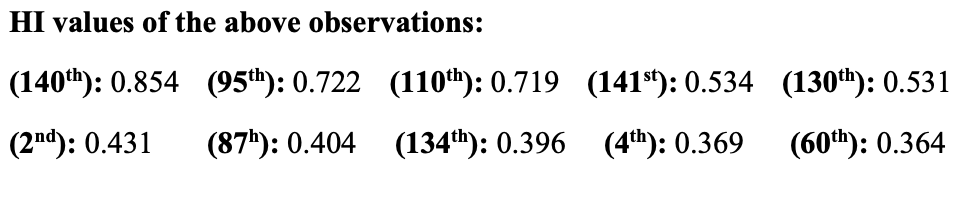


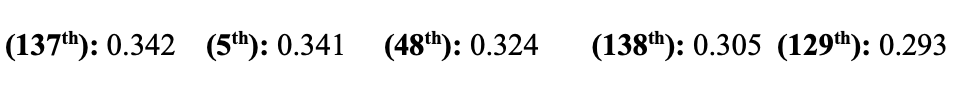

**✓ influential points:**

There seems not to have any influential points using Cooks Distance (COOK) since we’ve not detected any COOK values > 1
Comparing the absolute value of the DFITS with 2√((𝑝 + 1)/(𝑛 − 𝑝 − 2)) where p= 13 and n= 143. The cut-off point is 0.833. **There are 7 observations seem to be influenfial points** because their absolute DFIT > 0.661 listed as follow:

(140th): 1.962 

(95th): 1.159 

(71st): 0.974 

(138th): 0.884 

(73rd): 0.872 

(104th): 0.846 

(129th): 0.839

**• Checking Multicollinearity( correlation between predictors ):**

Since all VIF values are less than 10 for all terms. There’s no multicollinearity between the predictors.


**• Checking Linearity (lack-of-fit):**

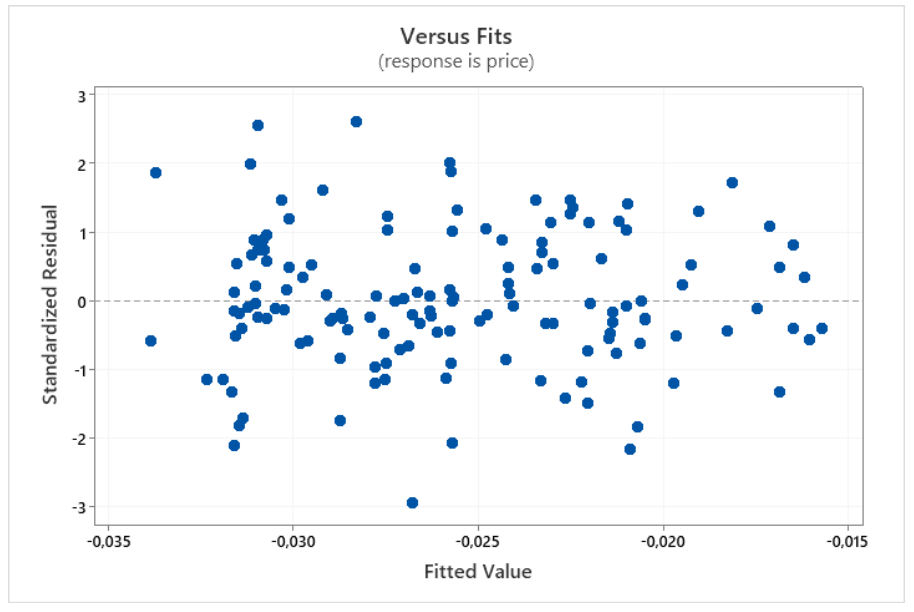

Visualizing the **standardized residuals versus fitted values plot** the means of the standardized residuals seem to be 0 at each value also there seems no to have a lack of fit problem, however, we’ll conduct a lack-of-fit test with 0.05 significance level and
𝐻0: There is no lack of fit in the model. 𝐻𝑎: There is a lack of fit in the model.

The p-value of the associated lack of fit test in Minitab is 0.591> 0.05 so we fail to reject the null hypothesis and conclude that **there is NO lack of fit in the model**.

**• Conclusion:**

From the above standardized residual analysis, by adding higher ordered terms to the model and applying power transformation to the response, we have no problems in the LINE assumptions. However, there’re 15 leverage points and 7 influential observations but they seem not to cause any problems in this model. Now that all the LINE assumptions hold we can conduct an F test for overall significance.

**Conducting an overall F test for significance:**

We conduct this test with a 0.05 significant level to see whether the fitted regression model (full model) fits the data better than the model with no independent variables(reduced model) at all.

𝐻0: β1 = β2= β3 = ... = β20

𝐻𝑎: at least one βj is not 0. For j = 1, 2, 3 ,,, 12

Minitab has reported the F-statistic with it’s associated p-value= 0.00 which is < 0.05, therefore we reject the null hypothesis and conclude that at least one βj is not 0 i.e the fitted regression model (full model) fits the data better than the model with no independent variables(reduced model)

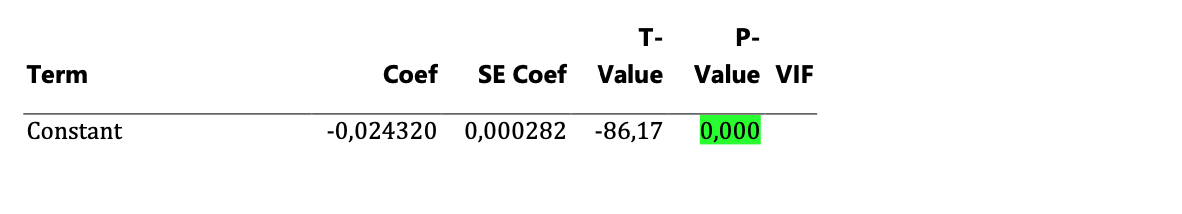

As the overall F test is significant, we’ll proceed with checking the significance of the individual model parameters.


**Checking the significance of the individual model parameters:**

With a 0.05 significant level: 𝐻0: βi = 0

𝐻𝑎: βi ≠ 0

For i = 1, 2, 3,,, 12

**The result:** some of the predictors' parameter estimates have p-value > 0.05 which means these predictors seem not to be significant for our model since a large p-value means we fail to reject the null hypothesis concluding that their slopes are not significantly different from 0. The next step should be refitting the model without these terms but I will start by deleting the insignificant interactions and any interactions with the insignificant terms.


**Conclusion:**

As there’s no problem in the LINE assumptions and overall F- test, we’ll refit a model without the insignificant parameters.



---



---





---



---



**Refitting the model:** 

again we checked the assumptions and they are all good but still have 2 insignificant terms. We’ll delete them and refit the model again.


**3.3.5 Analysis Step 5 (Minitab output in Appendix 1 - 3.3.5)**

**Checking LINE assumptions of the fitted regression model listed below:**


Y^-0.05 = - 0.008983 + 0.001108 curbweight – 0.000155 stroke
+ 0.000278 compressionratio + 0.000953 horsepower
- 0.000348 curbweight*horsepower - 0.000396 carbody -0.000509 enginetype +0.000865 cylindernumber -0.000476 fuelsystem


**• Checking Normality:**

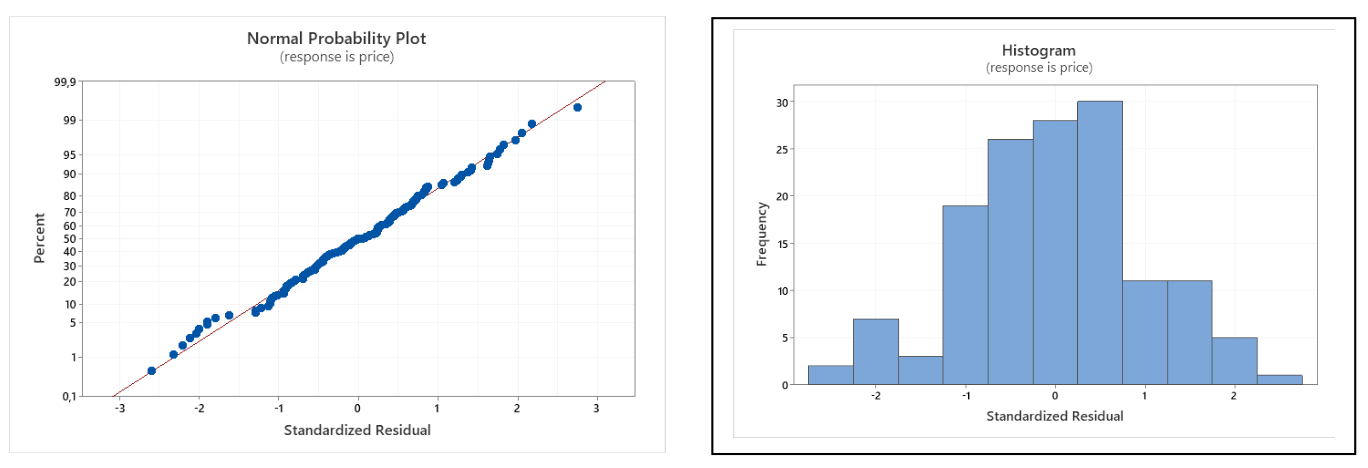

The points in the above **normal probability plot (NPP)** of the **standardized residuals** seem to follow the reference line well which means the standard residuals seem to be normally distributed. Also by looking at the histogram of the standardized residuals we might say that it has a bell-shaped distribution which again suggests that the standardized residuals follow a normal distribution. To check our claim we will conduct a Ryan-Joiner test (similar to the Shapiro-Wilk test ): with a 0.05 level of significance.

𝛼 = 0.05

𝐻0: standardized residuals follow a normal distribution.

𝐻𝑎: standardized residuals do NOT follow a normal distribution.

Since P-value >1.00 indicates that it’s also bigger than 0.05, we fail to reject the null hypothesis that the errors follow a normal distribution concluding that **the errors are normally distributed**.

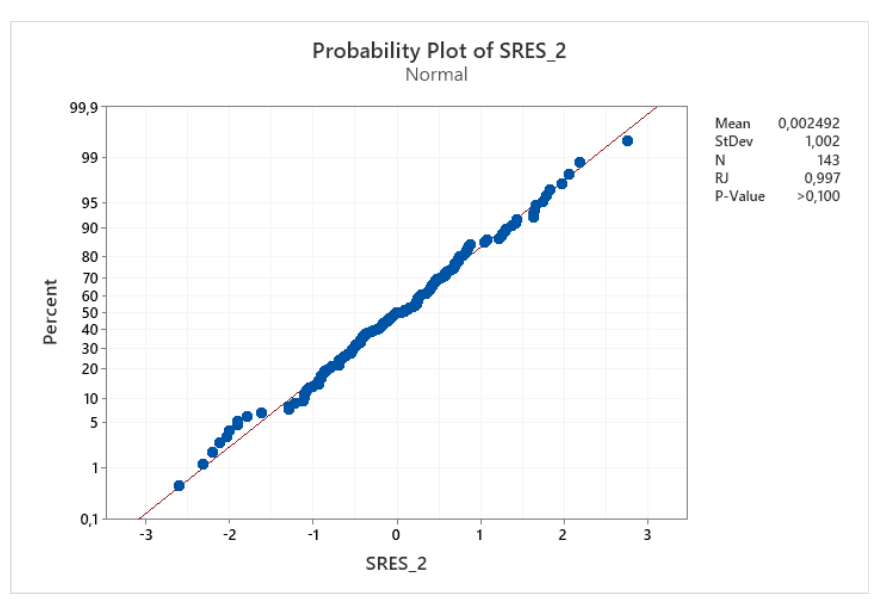

**• Checking Equal Error Variance:**

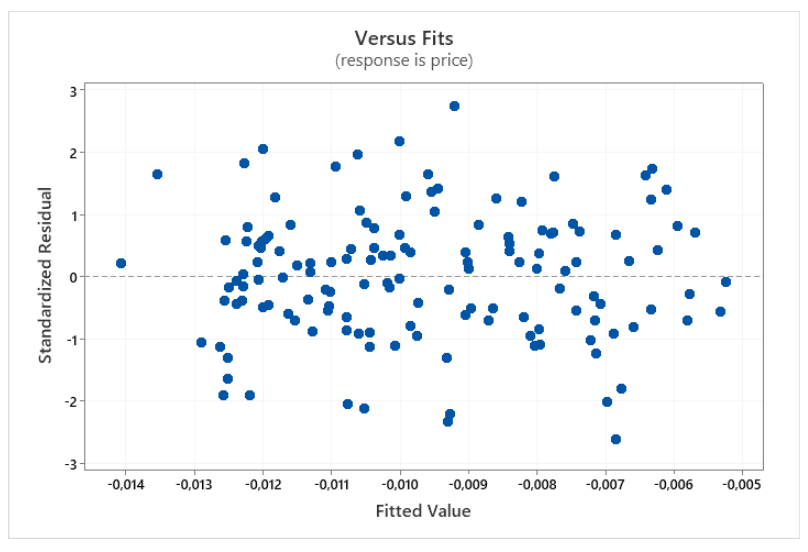

The above **standardized residuals versus fitted values plot** suggest that the variance of the errors might be constant since the points seem to create a band i.e the spread of the points is almost the same at each value. Since the standardized residuals are normally distributed and the data have replicates we can conduct Bartlett’s test for a constant variance of the errors with a 0.05 significance level.

𝐻0: Errors have a constant variance.

𝐻𝑎: Errors do NOT have constant variance.

We fail to reject that the errors have a constant variance because of P-value = 0.266 > 0.05. We conclude that **the errors have a constant variance**.

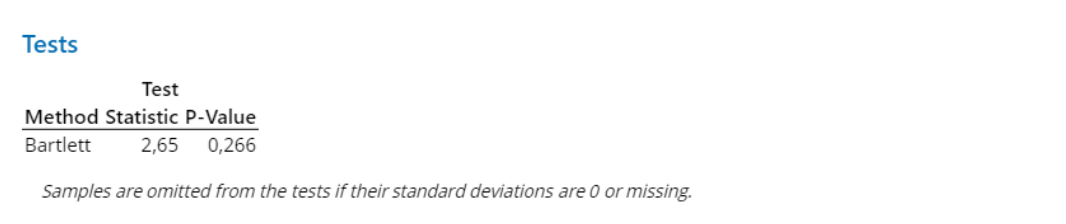